# Peak Annotation use R

In [1]:
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)

library(GenomicAlignments)
library(GenomicFeatures)

library(clusterProfiler)
library(biomaRt)
library(org.Hs.eg.db)
library(ReactomePA)

txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

ChIPseeker v1.34.0  For help: https://guangchuangyu.github.io/software/ChIPseeker

If you use ChIPseeker in publi

## Peaks Coverage Plot

In [2]:
pth2peaks_bed="../peak_calling/ATACSeq_ND6-DddAwt_REP-1.overlapped_peaks.narrowPeak"

peaks.bed=read.table(pth2peaks_bed, sep="\t", header=FALSE, blank.lines.skip=TRUE)[,c(1,2,3,4,5,6)]
peaks.bed = unique.data.frame(peaks.bed)
rownames(peaks.bed)=peaks.bed[,4]
# peaks.bed
peaks.gr <- GRanges(seqnames=peaks.bed[,1], ranges=IRanges(peaks.bed[,2], peaks.bed[,3]), strand="*", mcols=data.frame(peakID=peaks.bed[,4]))
# peaks.gr

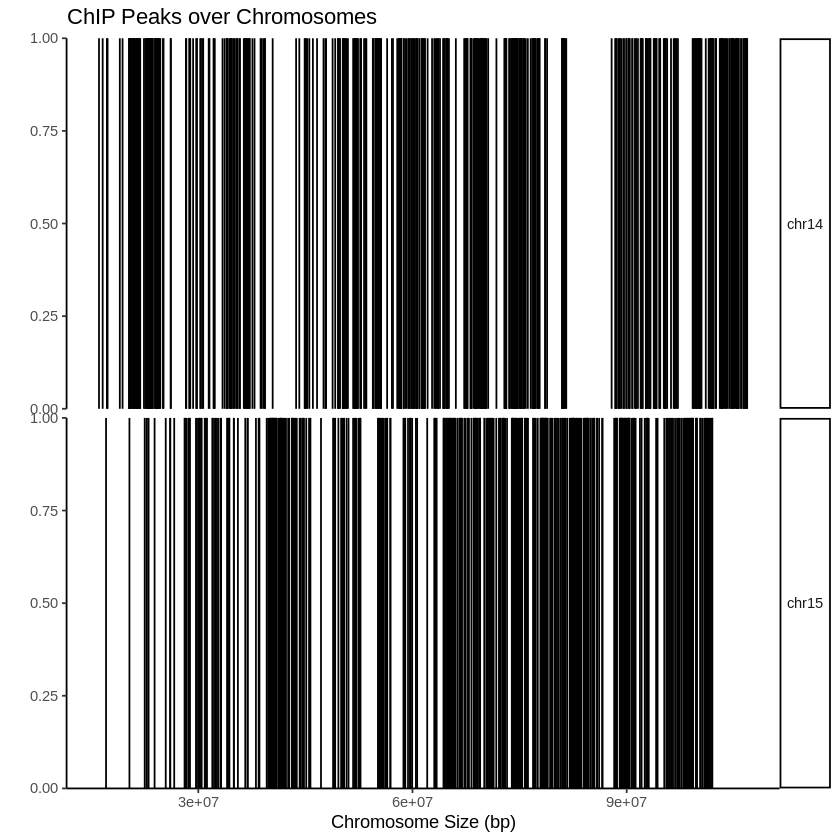

In [14]:
covplot(peaks.gr, chrs=c("chr14", "chr15"))

In [15]:
#to save the image to file
pdf("PeakCoverage.pdf")
covplot(peaks.gr, chrs=c("chr14", "chr15"))
dev.off()

png 
  2

## Peak Annotation

In [3]:
bed.annot = annotatePeak(peaks.gr, tssRegion=c(-3000, 3000),TxDb=txdb, annoDb="org.Hs.eg.db")
bed.annot

>> preparing features information...		 2023-09-02 04:09:25 PM 
>> identifying nearest features...		 2023-09-02 04:09:29 PM 
>> calculating distance from peak to TSS...	 2023-09-02 04:09:32 PM 
>> assigning genomic annotation...		 2023-09-02 04:09:32 PM 
>> adding gene annotation...			 2023-09-02 04:10:31 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2023-09-02 04:10:31 PM 
>> done...					 2023-09-02 04:10:31 PM 


Annotated peaks generated by ChIPseeker
16711/16711  peaks were annotated
Genomic Annotation Summary:
              Feature   Frequency
9    Promoter (<=1kb) 42.35533481
10   Promoter (1-2kb)  2.72874155
11   Promoter (2-3kb)  2.30985578
4              5' UTR  0.16157022
3              3' UTR  1.43617976
1            1st Exon  1.56184549
7          Other Exon  1.93884268
2          1st Intron  7.65962540
8        Other Intron 16.23481539
6  Downstream (<=300)  0.06582491
5   Distal Intergenic 23.54736401

In [4]:
annot_peaks=as.data.frame(bed.annot)
head(annot_peaks)

,seqnames,start,end,width,strand,mcols.peakID,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,chr1,9951,10234,284,*,peak_0,Promoter (1-2kb),1,11869,14409,2541,1,100287102,ENST00000456328.2,-1635,ENSG00000223972,DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene)
2,chr1,11231,11410,180,*,peak_1,Promoter (<=1kb),1,11869,14409,2541,1,100287102,ENST00000456328.2,-459,ENSG00000223972,DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene)
3,chr1,181714,182069,356,*,peak_4,Promoter (<=1kb),1,182696,184174,1479,1,102725121,ENST00000624431.2,-627,ENSG00000223972,DDX11L17,DEAD/H-box helicase 11 like 17 (pseudogene)
4,chr1,199232,200200,969,*,peak_8,Distal Intergenic,1,185217,195411,10195,2,102723897,ENST00000623083.4,-3821,NA,WASH9P,"WAS protein family homolog 9, pseudogene"
5,chr1,586097,586269,173,*,peak_9,Promoter (2-3kb),1,586278,588453,2176,2,105378947,ENST00000417636.2,2184,NA,LOC105378947,proline-rich extensin-like protein EPR1
6,chr1,633936,634118,183,*,peak_10,Promoter (<=1kb),1,594191,633129,38939,2,105378947,ENST00000440196.3,-807,NA,LOC105378947,proline-rich extensin-like protein EPR1


In [5]:
# write.table(annot_peaks, "nk_merged_annotated.txt",
#         append = FALSE,
#         quote = FALSE,
#         sep = "\t",
#         row.names = FALSE,
#         col.names = TRUE,
#         fileEncoding = "")


In [8]:
pdf("AnnotVis.pdf")
upsetplot(bed.annot, vennpie=TRUE)
dev.off()

Warning message:
“Removed 89 rows containing non-finite values (`stat_count()`).”


png 
  2

In [9]:
pdf("TSSdist.pdf")
plotDistToTSS(bed.annot, title="Distribution of ATAC-seq peaks loci\nrelative to TSS")
dev.off()

png 
  2

## Functional Analysis

In [10]:
#finding enriched Reactome pathways using chromosome 1 and 2 genes as a background
pathway.reac <- enrichPathway(as.data.frame(annot_peaks)$geneId)

#previewing enriched Reactome pathways
head(pathway.reac)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-HSA-9012999,R-HSA-9012999,RHO GTPase cycle,240/4764,449/10899,1.442231e-05,0.02249881,0.02023678,9341/23013/128272/55160/832/10250/91544/10726/10163/85440/84144/54874/9411/5825/1629/10451/4580/9181/57216/27/26092/9928/23380/51133/3930/8476/84033/58480/4548/57498/388/50618/6654/55704/7444/9938/10505/7535/55240/84317/50649/55843/390/10254/114793/7456/1123/10787/57679/10152/8452/9855/9901/55845/50650/200894/79598/8997/114885/5361/26084/22865/5337/1894/6434/5099/116984/399/51138/83478/10144/10424/79658/57630/153478/7204/10409/55789/10788/56990/1729/64411/23092/26999/1794/6793/23197/54438/50619/11329/221472/10817/3326/55227/222584/667/27145/4646/55023/57120/93663/57480/9590/50508/60/1124/10652/653361/55971/9732/1080/4698/9639/10395/23221/2185/80243/157769/80728/81704/84681/9414/56254/7410/10811/10276/57584/10006/22852/91452/94134/58504/9231/9644/120/1793/22800/392/4722/10963/29984/55004/9828/8301/143872/23365/9743/55200/121512/5756/347902/29843/27289/10376/29127/8086/3071/23344/115557/57522/10818/10576/7112/23074/10970/51347/11113/23141/90627/94240/81624/23348/8874/23263/23256/394/253959/6655/3895/23002/57381/87/3320/9578/29766/55075/79834/11214/8826/5930/25894/50855/29/9912/224/28964/57636/147179/3728/284119/201176/124540/1213/23580/2885/10928/6093/1828/1829/3998/23526/23370/57572/5585/7171/4650/51291/10298/9138/55968/57580/84612/57473/7074/6453/4689/26286/25813/23779/395/158747/4810/1536/2245/4983/9754/139818/9459/27316/8776,240
R-HSA-195253,R-HSA-195253,Degradation of beta-catenin by the destruction complex,53/4764,83/10899,1.646787e-04,0.03900970,0.03508767,3065/5686/5710/5692/83439/5707/1499/9861/2932/5708/51176/324/6932/1452/5696/5698/5689/7979/5516/7091/7088/5695/8945/6934/1488/5682/5702/5526/5519/5715/7316/5693/5720/5687/5706/5684/5529/5700/5527/7090/5685/8312/7314/5717/10197/5718/7089/7311/5714/5704/5518/9978/139285,53
R-HSA-5173214,R-HSA-5173214,O-glycosylation of TSR domain-containing proteins,28/4764,38/10899,1.712877e-04,0.03900970,0.03508767,9507/80731/56999/54437/10417/9508/11174/9509/221981/157869/92949/11093/140766/11095/170689/80070/145173/55901/7057/79875/57188/170691/170692/339366/81794/9510/23275/5199,28
R-HSA-179419,R-HSA-179419,APC:Cdc20 mediated degradation of cell cycle proteins prior to satisfation of the cell cycle checkpoint,48/4764,74/10899,1.902123e-04,0.03900970,0.03508767,5686/5710/5692/4751/64682/5707/7324/9861/5708/4085/890/10393/8697/5696/5698/5689/7979/246184/5695/29882/7321/983/119504/5682/5702/25906/51433/5715/7316/8900/8881/5693/5720/5687/5706/5684/5700/701/5685/7314/5717/10197/996/5718/7311/5714/5704/27338,48
R-HSA-176409,R-HSA-176409,APC/C:Cdc20 mediated degradation of mitotic proteins,49/4764,76/10899,2.038649e-04,0.03900970,0.03508767,5686/5710/5692/4751/64682/5707/7324/9861/5708/4085/890/10393/8697/9232/5696/5698/5689/7979/246184/5695/29882/7321/983/119504/5682/5702/25906/51433/5715/7316/8900/8881/5693/5720/5687/5706/5684/5700/701/5685/7314/5717/10197/996/5718/7311/5714/5704/27338,49
R-HSA-2467813,R-HSA-2467813,Separation of Sister Chromatids,108/4764,191/10899,2.181853e-04,0.03900970,0.03508767,100526739/10726/11004/23421/5686/5710/5692/11243/1063/1058/7514/5903/699/64682/57405/1781/151246/5707/6396/7324/23122/9861/10274/5708/23244/1060/1062/4085/10393/79682/3796/64946/8697/9232/54908/7280/5696/5698/5689/8379/1780/7979/5516/401541/246184/5695/29882/347688/11130/7321/119504/23063/9126/5682/9793/5702/23279/5526/113130/25906/5519/9183/10376/9700/5501/51433/5715/6249/7316/23047/8881/5693/5720/5687/5706/5684/5529/5700/5527/1778/701/57082/5685/54820/81565/7314/57551/5717/10197/996/140735/348235/5718/79902/332/81929/220134/147841/7311/5714/5704/5518/27338/79980/79019/54821/55869/2491,108


In [11]:
colnames(as.data.frame(pathway.reac))

[1] "ID"          "Description" "GeneRatio"   "BgRatio"     "pvalue"     
[6] "p.adjust"    "qvalue"      "geneID"      "Count"

In [12]:
pathway.GO <- enrichGO(as.data.frame(annot_peaks)$geneId, org.Hs.eg.db, ont = "MF")

In [13]:
pathway.GO[1:11,c(1,2,7)]

,ID,Description,qvalue
,<chr>,<chr>,<dbl>
GO:0015631,GO:0015631,tubulin binding,9.446823e-07
GO:0030695,GO:0030695,GTPase regulator activity,7.372647e-06
GO:0060589,GO:0060589,nucleoside-triphosphatase regulator activity,7.372647e-06
GO:0008017,GO:0008017,microtubule binding,8.491090e-05
GO:0003779,GO:0003779,actin binding,2.983222e-04
GO:0005096,GO:0005096,GTPase activator activity,6.263565e-04
GO:0035091,GO:0035091,phosphatidylinositol binding,2.767394e-03
GO:0005085,GO:0005085,guanyl-nucleotide exchange factor activity,7.522823e-03
GO:0004674,GO:0004674,protein serine/threonine kinase activity,7.522823e-03


# Differential Accessibility in ATAC-seq use R

```bash
# see ~/3.project/2022_DdCBE-3D-Genome_topic/2023-04-25_ATAC-seq/featureCounts_saf/log.sh
```

In [1]:
library(statmod)
library(edgeR)
library(EDASeq)

library(GenomicAlignments)
library(GenomicFeatures)

library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(wesanderson)

library(Hmisc)
library(dplyr)

library(tidyverse)

Warning message:
“package ‘statmod’ was built under R version 4.2.3”
Warning message:
“package ‘edgeR’ was built under R version 4.2.3”
Loading required package: limma

Warning message:
“package ‘limma’ was built under R version 4.2.3”
Loading required package: Biobase

Warning message:
“package ‘Biobase’ was built under R version 4.2.3”
Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unspl

In [215]:
txdb = TxDb.Hsapiens.UCSC.hg38.knownGene

fastafile = FaFile("~/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa")

In [497]:
# We can read in the data, format it and define experimental groups:
countdata = read.table("../featureCounts_saf/all.TAS-dependent_additional.saf.featureCounts.counts", sep="\t", header=TRUE, blank.lines.skip=TRUE)
rownames(countdata)=countdata$Geneid
df_coor = tibble(countdata$Geneid)
head(countdata)

,Geneid,Chr,Start,End,Strand,Length,...bam_downsample.GFP.NLS_REP.1.downsample.bam,...bam_downsample.GFP_REP.1.downsample.bam,...bam_downsample.ND6.DddAwt_REP.1.downsample.bam,...bam_downsample.ND6.DddAwt_REP.2.downsample.bam,...bam_downsample.SIRT6.DddA11_REP.1.downsample.bam,...bam_downsample.SIRT6.DddA11_REP.2.downsample.bam
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr12.25863175.25863375,chr12.25863175.25863375,chr12,25863175,25863375,.,201,5,9,7,8,11,8
chr3.58525476.58525676,chr3.58525476.58525676,chr3,58525476,58525676,.,201,0,5,2,4,2,0
chr3.72601399.72601599,chr3.72601399.72601599,chr3,72601399,72601599,.,201,3,6,6,4,4,3
chr4.165860294.165860494,chr4.165860294.165860494,chr4,165860294,165860494,.,201,0,0,0,2,0,0
chr5.172924802.172925002,chr5.172924802.172925002,chr5,172924802,172925002,.,201,2,4,2,5,4,2
chr7.14705110.14705310,chr7.14705110.14705310,chr7,14705110,14705310,.,201,0,0,0,0,3,1


In [498]:
# DA analysis!!!

# GFP-NLS_REP-1.downsample.bam
# GFP_REP-1.downsample.bam
# ND6-DddAwt_REP-1.downsample.bam
# ND6-DddAwt_REP-2.downsample.bam
# SIRT6-DddA11_REP-1.downsample.bam
# SIRT6-DddA11_REP-2.downsample.bam

group =c(rep("GFP-NLS",1),rep("GFP",1), rep("ND6-DddAwt",2), rep("SIRT6-DddAwt",2))
group

# sel_part = c(1, 3, 4)
# sel_part = c(1, 5, 6)
# sel_part = c(2, 3, 4)
sel_part = c(2, 5, 6)
group = factor(group[sel_part])
group

[1] "GFP-NLS"      "GFP"          "ND6-DddAwt"   "ND6-DddAwt"   "SIRT6-DddAwt"
[6] "SIRT6-DddAwt"

[1] GFP          SIRT6-DddAwt SIRT6-DddAwt
Levels: GFP SIRT6-DddAwt

In [499]:
countdata <- countdata[,c(c(2:6), sel_part + 6)]
group

head(countdata)

[1] GFP          SIRT6-DddAwt SIRT6-DddAwt
Levels: GFP SIRT6-DddAwt

,Chr,Start,End,Strand,Length,...bam_downsample.GFP_REP.1.downsample.bam,...bam_downsample.SIRT6.DddA11_REP.1.downsample.bam,...bam_downsample.SIRT6.DddA11_REP.2.downsample.bam
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
chr12.25863175.25863375,chr12,25863175,25863375,.,201,9,11,8
chr3.58525476.58525676,chr3,58525476,58525676,.,201,5,2,0
chr3.72601399.72601599,chr3,72601399,72601599,.,201,6,4,3
chr4.165860294.165860494,chr4,165860294,165860494,.,201,0,0,0
chr5.172924802.172925002,chr5,172924802,172925002,.,201,4,4,2
chr7.14705110.14705310,chr7,14705110,14705310,.,201,0,3,1


In [500]:
#this data frame contains only read counts to peaks on assembled chromosomes
reads.peak = countdata[,c(1:length(sel_part)) + 5]
reads.peak

,...bam_downsample.GFP_REP.1.downsample.bam,...bam_downsample.SIRT6.DddA11_REP.1.downsample.bam,...bam_downsample.SIRT6.DddA11_REP.2.downsample.bam
,<int>,<int>,<int>
chr12.25863175.25863375,9,11,8
chr3.58525476.58525676,5,2,0
chr3.72601399.72601599,6,4,3
chr4.165860294.165860494,0,0,0
chr5.172924802.172925002,4,4,2
chr7.14705110.14705310,0,3,1
chr7.141227288.141227488,2,4,6
chr8.115357870.115358070,0,0,0
chr18.26089709.26089909,47,36,42


In [501]:
# We now prepare data with GC content of the peak regions for GC-aware normalisation.
colnames(df_coor) = 'str_id'
df_coor <- df_coor %>% separate(str_id, c('chrom', 'start', 'end')) %>% mutate(
    start = as.integer(start), end = as.integer(end),
)
head(df_coor, 3)


gr = GRanges(seqnames=df_coor$chrom, ranges=IRanges(df_coor$start, df_coor$end), strand="*", mcols=data.frame(peakID=countdata$Geneid))
gr

chrom,start,end
<chr>,<int>,<int>
chr12,25863175,25863375
chr3,58525476,58525676
chr3,72601399,72601599


GRanges object with 1604 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]    chr12   25863175-25863375      *
     [2]     chr3   58525476-58525676      *
     [3]     chr3   72601399-72601599      *
     [4]     chr4 165860294-165860494      *
     [5]     chr5 172924802-172925002      *
     ...      ...                 ...    ...
  [1600]     chrX 107736927-107737127      *
  [1601]     chrX 129833015-129833215      *
  [1602]     chrX 135098991-135099191      *
  [1603]     chrX 136638050-136638250      *
  [1604]     chrX 154679118-154679318      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [502]:
peakSeqs = getSeq(x=fastafile, gr)
gcContentPeaks = letterFrequency(peakSeqs, "GC",as.prob=TRUE)[,1]

In [503]:
# #divide into 20 bins by GC content
gcGroups = Hmisc::cut2(gcContentPeaks, g=20)
mcols(gr)$gc = gcContentPeaks

In [504]:
lowListGC = list()
for(kk in 1:ncol(reads.peak)){
  set.seed(kk)
  lowListGC[[kk]] = lowess(x=gcContentPeaks, y=log1p(reads.peak[,kk]), f=1/10)
}

names(lowListGC)=colnames(reads.peak)
# head(lowListGC, 1)

In [505]:
dfList = list()
for(ss in 1:length(lowListGC)){
  oox = order(lowListGC[[ss]]$x)
  dfList[[ss]] = data.frame(x=lowListGC[[ss]]$x[oox], y=lowListGC[[ss]]$y[oox], sample=names(lowListGC)[[ss]])
}
dfAll = do.call(rbind, dfList)
dfAll$sample = factor(dfAll$sample)

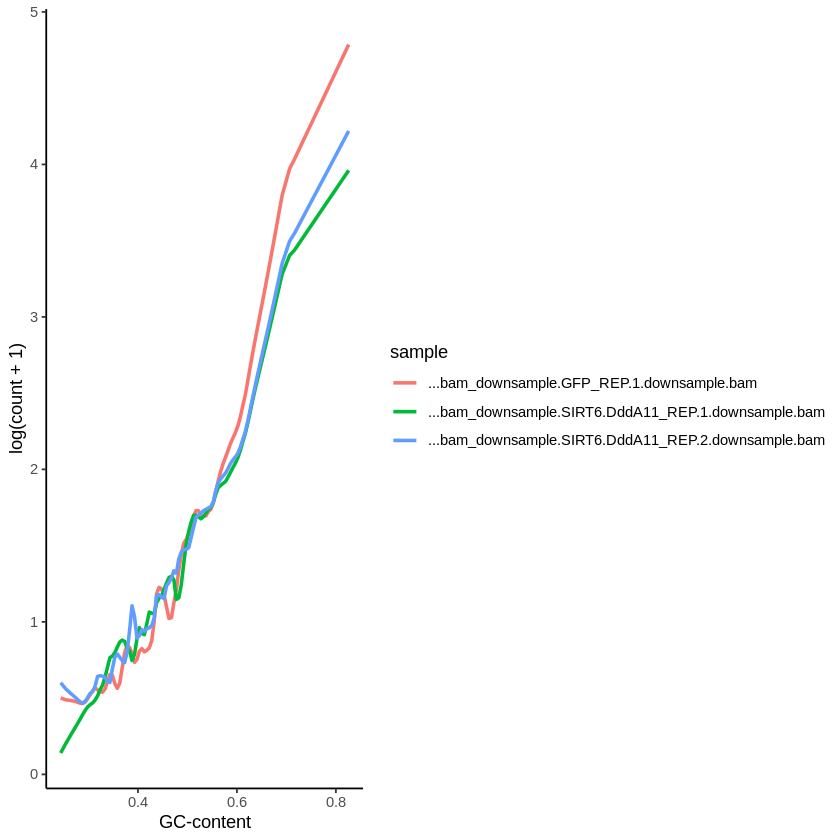

In [506]:
## plot just the average GC content
p.gc = ggplot(dfAll, aes(x=x, y=y, group=sample, color=sample)) +
  geom_line(linewidth = 1) +
  xlab("GC-content") +
  ylab("log(count + 1)") +
  theme_classic()
p.gc
ggsave("GCcontent_peaks.pdf", p.gc, height = 6, width = 10)

In [507]:
# 特定基因组区域的可及性测量与其GC含量相关。然而，曲线的斜率和形状可能因样品而异，这表明GC含量效应是特定于样品的，因此可能会在样品比较之间产生偏差。于是需要做上述分析

# 我们现在使用 edgeR 的统计框架。我们不像往常一样执行内部归一化 （TMM），而是提供由 EDASeq 计算的偏移量。

# 要计算偏移量，以校正文库大小和GC含量（两种情况下均为完全分位数归一化）：
reads.peak=as.matrix(reads.peak)
dataOffset = withinLaneNormalization(reads.peak,y=gcContentPeaks,num.bins=20,which="full",offset=TRUE)
dataOffset = betweenLaneNormalization(reads.peak,which="full",offset=TRUE)
head(dataOffset)

,...bam_downsample.GFP_REP.1.downsample.bam,...bam_downsample.SIRT6.DddA11_REP.1.downsample.bam,...bam_downsample.SIRT6.DddA11_REP.2.downsample.bam
chr12.25863175.25863375,0,0.0000000,0.0000000
chr3.58525476.58525676,0,0.0000000,0.0000000
chr3.72601399.72601599,0,0.0000000,0.0000000
chr4.165860294.165860494,0,0.0000000,0.0000000
chr5.172924802.172925002,0,0.0000000,-0.6466272
chr7.14705110.14705310,0,-0.3894648,-2.3978953


In [508]:
design = model.matrix(~group)
design

,(Intercept),groupSIRT6-DddAwt
1,1,0
2,1,1
3,1,1


In [509]:
#数据预处理
#（1）构建 DGEList 对象
dgelist <- DGEList(counts = reads.peak, group = group)
# dgelist

In [510]:
#（2）过滤 low count 数据
keep = filterByExpr(dgelist)
summary(keep)
dgelist <- dgelist[keep, , keep.lib.sizes = FALSE]

   Mode   FALSE    TRUE 
logical    1380     224 

In [511]:
# RNA-seq
# #（3）标准化，以 TMM 标准化为例
# dgelist_norm <- calcNormFactors(dgelist, method = 'TMM')
# #差异表达基因分析
# design <- model.matrix(~group)
#（1）估算基因表达值的离散度
# dge <- estimateDisp(dgelist_norm, design, robust = TRUE)
# #（2）模型拟合，edgeR 提供了多种拟合算法
# 1. )
#    #负二项广义对数线性模型
#    fit <- glmFit(dge, design, robust = TRUE)
#    lrt <- topTags(glmLRT(fit), n = nrow(dgelist$counts))
# 2. )
#    mode='glmQLFTest'
#    #拟似然负二项广义对数线性模型
#    fit <- glmQLFit(dge, design, robust = TRUE)
#    lrt <- topTags(glmQLFTest(fit), n = nrow(dgelist$counts))

# ATAC-seq
dgelist$offset = -dataOffset[keep,]
# Normalize use EDASeq package 我们现在使用 edgeR 的统计框架。我们不像往常一样执行内部归一化 （TMM），而是提供由 EDASeq 计算的偏移量。
dgelist.eda = estimateGLMCommonDisp(dgelist, design = design)

fit = glmFit(dgelist.eda, design = design)
lrt.EDASeq = glmLRT(fit, coef = 2)
DA_res=as.data.frame(topTags(lrt.EDASeq, nrow(lrt.EDASeq$table)))

In [512]:
#排序并标出UP/down
fdr=0.05 # 指定调整后p的阈值


lrt<-DA_res
gene_diff <- lrt[order(lrt$FDR, lrt$logFC, decreasing = c(FALSE, TRUE)), ]
gene_diff[which(gene_diff$logFC >= 1 & gene_diff$FDR < fdr),'sig'] <- 'up'
gene_diff[which(gene_diff$logFC <= -1 & gene_diff$FDR < fdr),'sig'] <- 'down'
gene_diff[which(abs(gene_diff$logFC) <= 1 | gene_diff$FDR >= fdr),'sig'] <- 'non-significant'
gene_diff

,logFC,logCPM,LR,PValue,FDR,sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1.74085909.74086109,-3.520098,10.44989,14.307998,0.0001552041,0.03476571,down
chr14.73283541.73283741,6.054541,10.37526,10.184151,0.0014165289,0.15439391,non-significant
chr15.68642510.68642710,5.930737,10.30721,9.353398,0.0022257237,0.15439391,non-significant
chr2.219685479.219685679,-2.899473,10.24492,8.961666,0.0027570341,0.15439391,non-significant
chr2.56021267.56021467,2.674327,11.00767,6.621115,0.0100776747,0.37623319,non-significant
chr20.45951719.45951919,-2.179623,10.65790,6.655711,0.0098838523,0.37623319,non-significant
chr7.131879113.131879313,-2.209948,10.44002,6.164622,0.0130330199,0.41705664,non-significant
chr12.111643445.111643645,2.381129,10.77279,5.071288,0.0243252968,0.60542961,non-significant
chr2.65431341.65431541,-1.555061,11.79748,5.206886,0.0224975928,0.60542961,non-significant


In [513]:
# #输出总表
# write.table(gene_diff, paste(outname,'.txt',sep=""), sep = '\t', col.names = NA, quote = FALSE)      
# #输出选择的差异基因总表
# gene_diff_select <- subset(gene_diff, sig %in% c('up', 'down'))
# write.table(gene_diff_select, file = paste(outname,'.select.txt',sep=""), sep = '\t', col.names = NA, quote = FALSE)

In [514]:
# gcGroups.sub=gcGroups[keep]
# dfEdgeR = data.frame(logFC=log(2^lrt.EDASeq$table$logFC), gc=gcGroups.sub)

# pedgeR = ggplot(dfEdgeR) +
#   aes(x=gc, y=logFC, color=gc) +
#   geom_violin() +
#   geom_boxplot(width=0.1) +
#   scale_color_manual(values=wesanderson::wes_palette("Zissou1", nlevels(gcGroups), "continuous")) +
#   geom_abline(intercept = 0, slope = 0, col="black", lty=2) +
#   ylim(c(-1,1)) +
#   ggtitle("log2FCs in bins by GC content") +
#   xlab("GC-content bin") +
#   theme_bw()+
#   theme(aspect.ratio = 1)+
#   theme(axis.text.x = element_text(angle = 45, vjust = .5),
#         legend.position = "none",
#         axis.title = element_text(size=16))
# pedgeR
# ggsave(filename="log2FC_vs_GCcontent.pdf",plot=pedgeR)

In [515]:
head(gene_diff)

,logFC,logCPM,LR,PValue,FDR,sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1.74085909.74086109,-3.520098,10.44989,14.307998,0.0001552041,0.03476571,down
chr14.73283541.73283741,6.054541,10.37526,10.184151,0.0014165289,0.15439391,non-significant
chr15.68642510.68642710,5.930737,10.30721,9.353398,0.0022257237,0.15439391,non-significant
chr2.219685479.219685679,-2.899473,10.24492,8.961666,0.0027570341,0.15439391,non-significant
chr2.56021267.56021467,2.674327,11.00767,6.621115,0.0100776747,0.37623319,non-significant
chr20.45951719.45951919,-2.179623,10.65790,6.655711,0.0098838523,0.37623319,non-significant


Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”


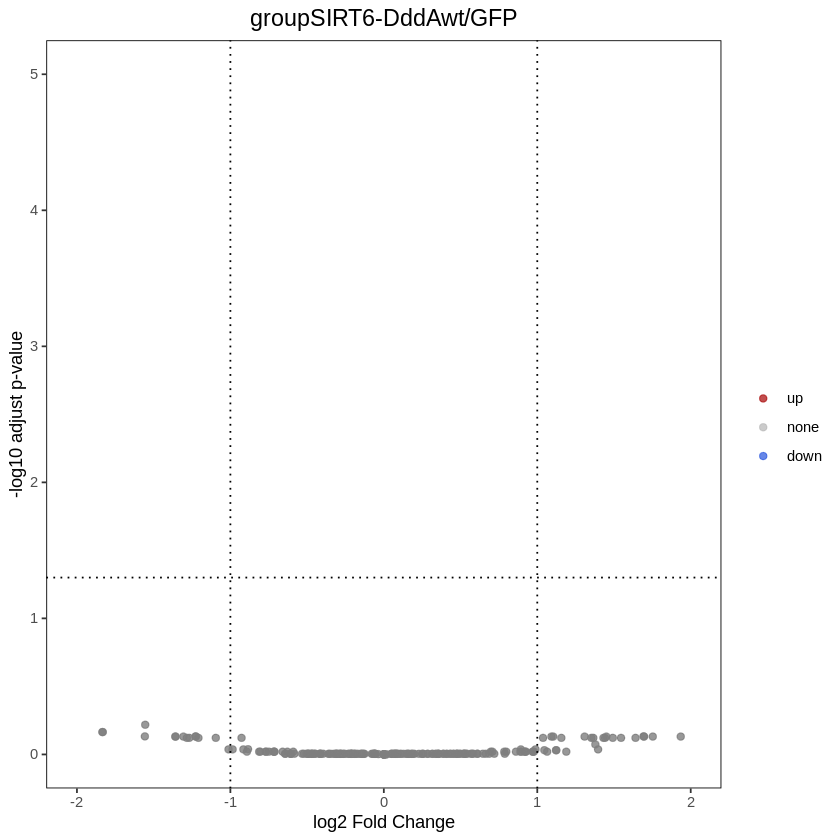

In [516]:
### plot valcano ------------------------------------------------------------------------>
vp <- ggplot(data = gene_diff, aes(x = logFC, y = -log10(FDR),color = sig)) +
  geom_point(size = 1.7, alpha=0.8) +  #绘制散点图
  scale_color_manual(values = c('#B22222', 'gray', '#4169E1'), limits = c('up', 'none', 'down')) +  #自定义点的颜色
  labs(x = 'log2 Fold Change', y = '-log10 adjust p-value', title = str_c(lrt.EDASeq$comparison, '/', group), color = '') +  #坐标轴标题
  theme(plot.title = element_text(hjust = 0.5, size = 14), panel.grid = element_blank(), #背景色、网格线、图例等主题修改
        panel.background = element_rect(color = 'black', fill = 'transparent'),
        legend.key = element_rect(fill = 'transparent')) +
  geom_vline(xintercept = c(-1, 1), lty = 3, color = 'black') +  #添加阈值线
  geom_hline(yintercept = 1.3, lty = 3, color = 'black') +
  xlim(-2, 2) + ylim(0, 5)

vp

# Transcription Factor Footprinting use R

In [3]:
library(ATACseqQC)
library(MotifDb)

library(BSgenome.Hsapiens.UCSC.hg38)
genome <- Hsapiens



See system.file("LICENSE", package="MotifDb") for use restrictions.

Loading required package: BSgenome

Loading required package: rtracklayer



In [4]:
# Let’s first check signatures for a general TF CTCF. This is its motif as position weight matrix (PWM):

CTCF <- query(MotifDb, c("CTCF"))
CTCF <- as.list(CTCF)
print(CTCF[[1]], digits=2)

     1    2    3     4     5     6     7     8     9    10    11    12    13
A 0.10 0.16 0.30 0.072 0.012 0.786 0.024 0.122 0.914 0.012 0.376 0.022 0.028
C 0.36 0.21 0.10 0.826 0.966 0.024 0.620 0.494 0.010 0.008 0.010 0.022 0.002
G 0.12 0.41 0.44 0.050 0.012 0.108 0.336 0.056 0.048 0.976 0.602 0.606 0.962
T 0.42 0.22 0.16 0.052 0.010 0.082 0.020 0.328 0.028 0.004 0.012 0.350 0.008
     14    15    16    17   18   19
A 0.024 0.096 0.424 0.086 0.12 0.34
C 0.016 0.818 0.024 0.532 0.35 0.26
G 0.880 0.038 0.522 0.326 0.12 0.32
T 0.080 0.048 0.030 0.056 0.41 0.08


In [25]:
# We now summarise the signal in the vicinity of CTCF motifs (100 bps up- and down-stream):
seqlev = paste0("chr", c(1:22, "X", "Y"))  # time spend too much!!!

# right bam
# shifted.bamFile = '../bam_shift_alignments/ATACSeq_GFP_REP-1/chr19/shifted.bam'
# seqlev = 'chr1'

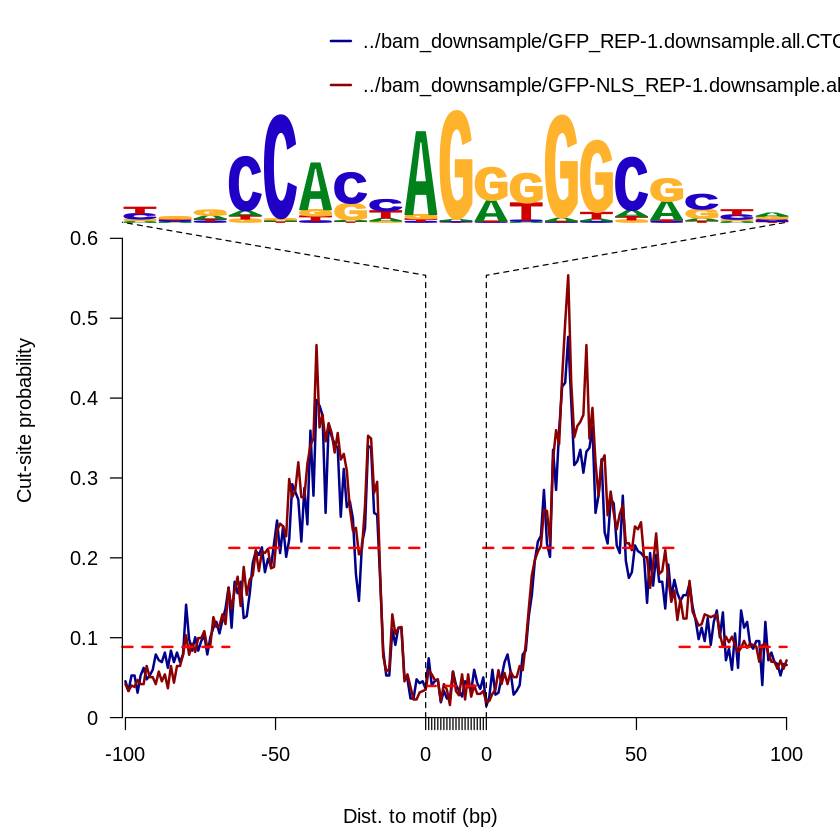

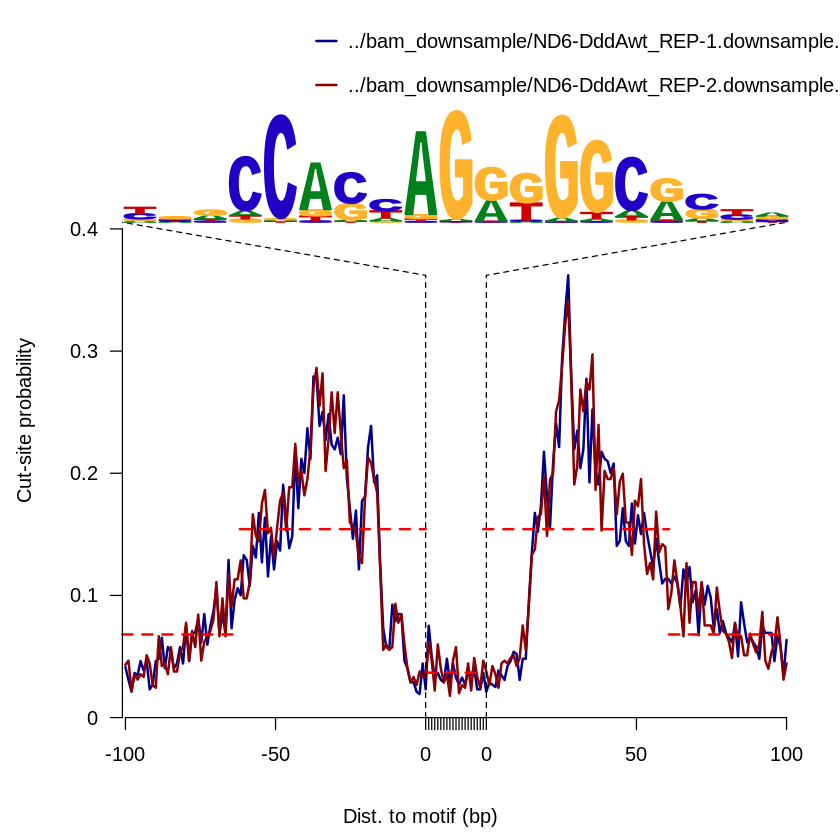

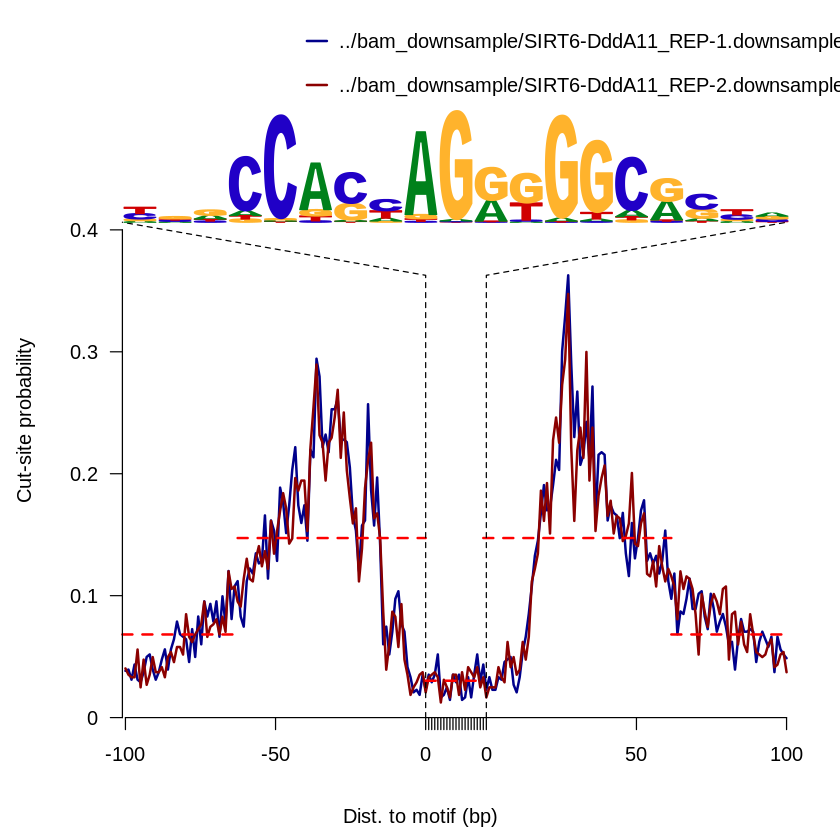

In [27]:
# use downsampling bam!!!
# GFP-NLS vs GFP
shifted.bamFile = c('../bam_downsample/GFP-NLS_REP-1.downsample.all.CTCF.bam', '../bam_downsample/GFP_REP-1.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )
# wt1 vs wt2
shifted.bamFile = c('../bam_downsample/ND6-DddAwt_REP-1.downsample.all.CTCF.bam', '../bam_downsample/ND6-DddAwt_REP-2.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )
# SIRT6_1 vs SIRT6_2
shifted.bamFile = c('../bam_downsample/SIRT6-DddA11_REP-1.downsample.all.CTCF.bam', '../bam_downsample/SIRT6-DddA11_REP-2.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )

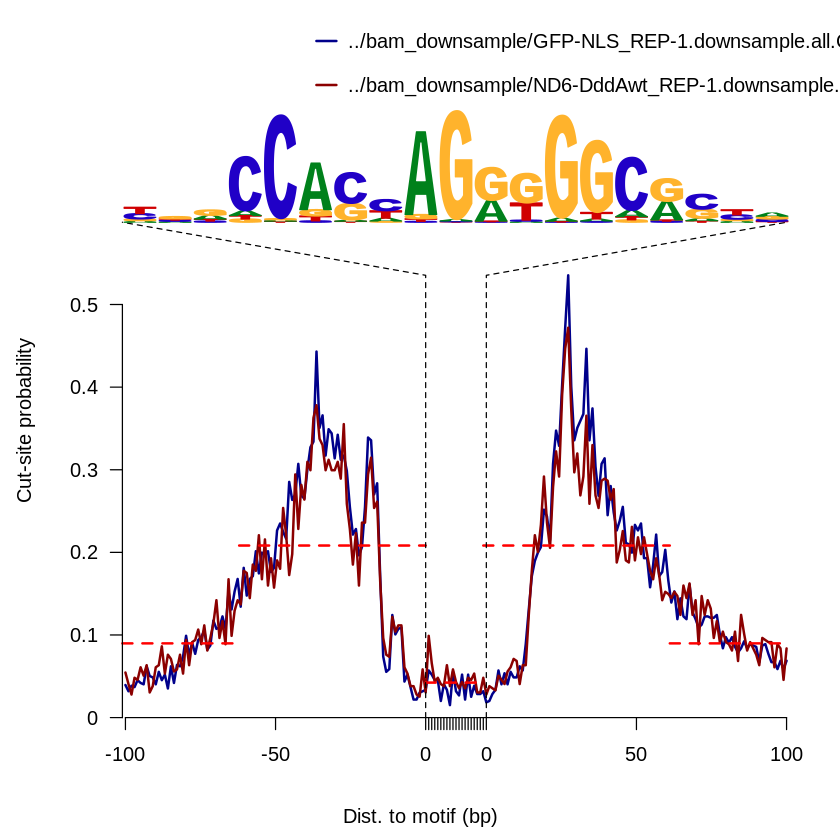

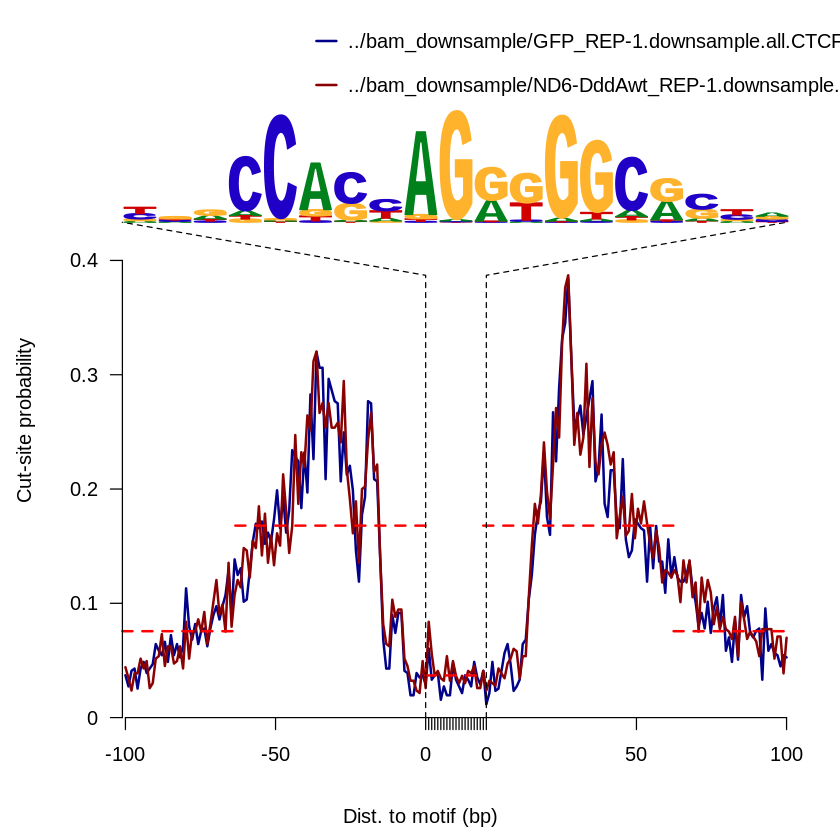

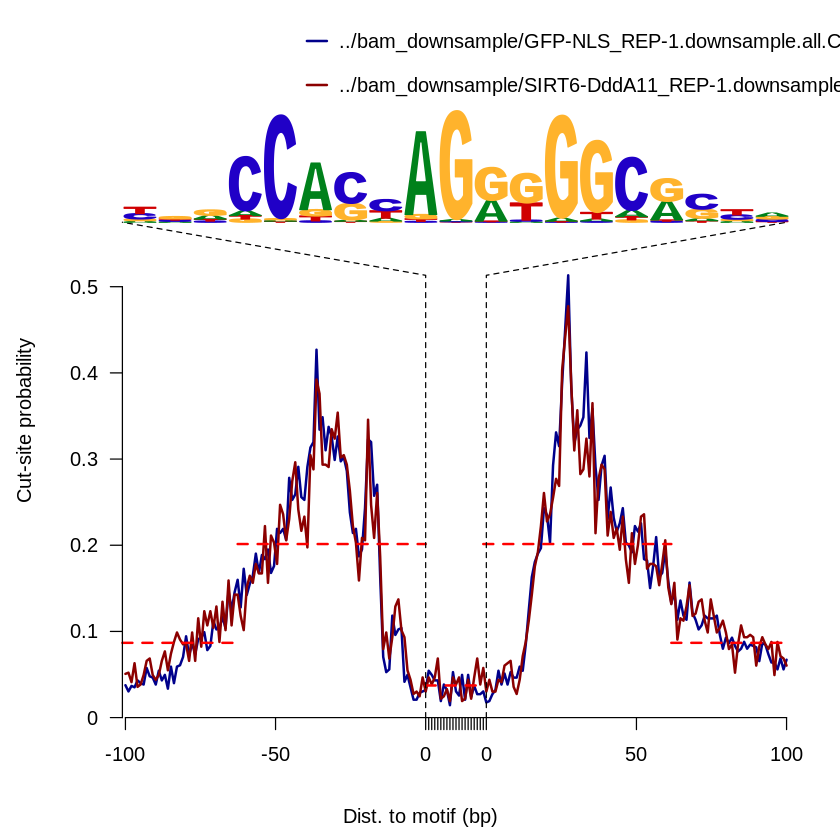

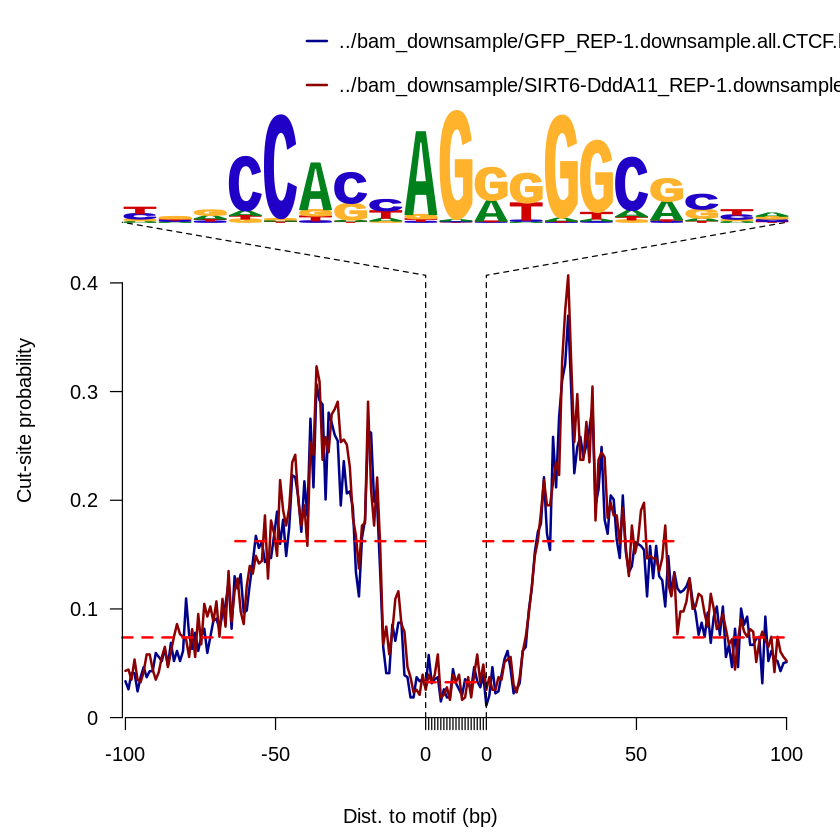

In [28]:
# wt1 vs GFP-NLS
shifted.bamFile = c('../bam_downsample/ND6-DddAwt_REP-1.downsample.all.CTCF.bam', '../bam_downsample/GFP-NLS_REP-1.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )
# wt1 vs GFP
shifted.bamFile = c('../bam_downsample/ND6-DddAwt_REP-1.downsample.all.CTCF.bam', '../bam_downsample/GFP_REP-1.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )
# SIRT6_1 vs GFP-NLS
shifted.bamFile = c('../bam_downsample/SIRT6-DddA11_REP-1.downsample.all.CTCF.bam', '../bam_downsample/GFP-NLS_REP-1.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )
# SIRT6_1 vs GFP
shifted.bamFile = c('../bam_downsample/SIRT6-DddA11_REP-1.downsample.all.CTCF.bam', '../bam_downsample/GFP_REP-1.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )

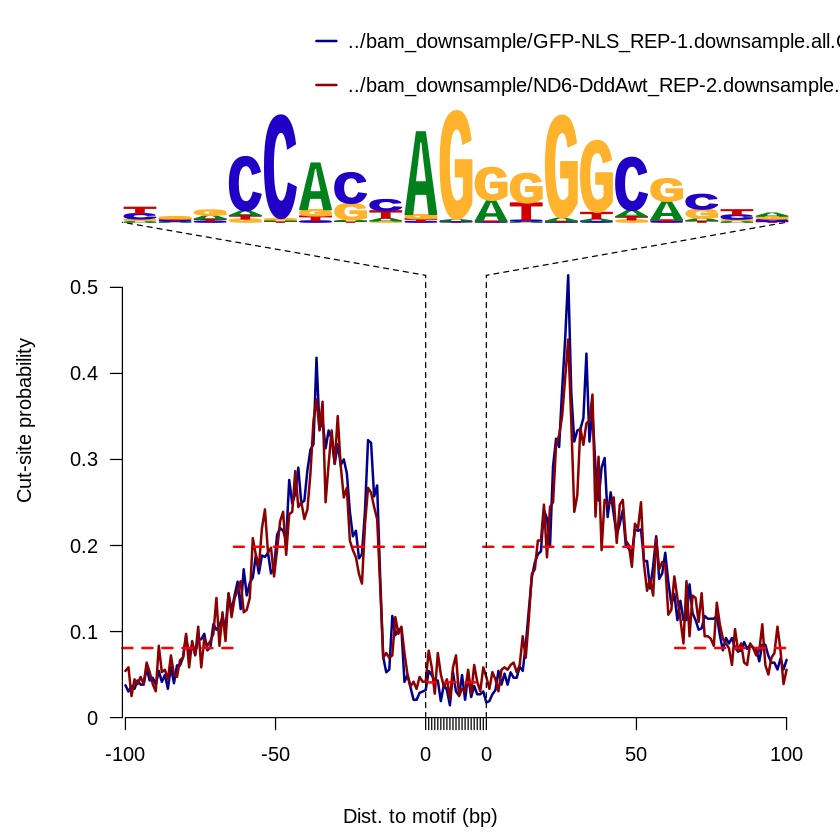

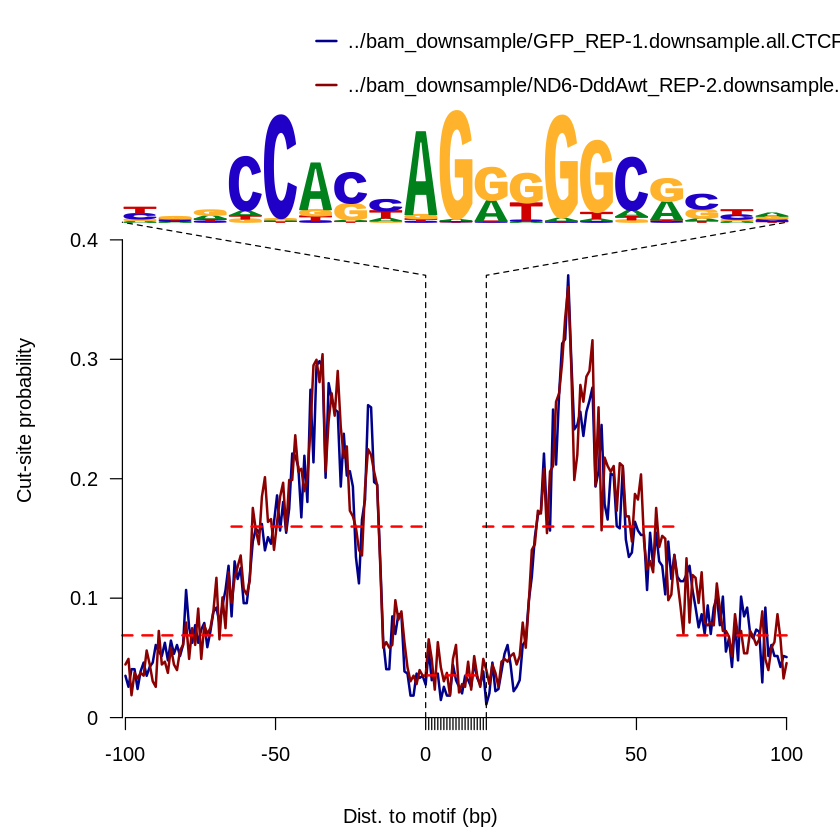

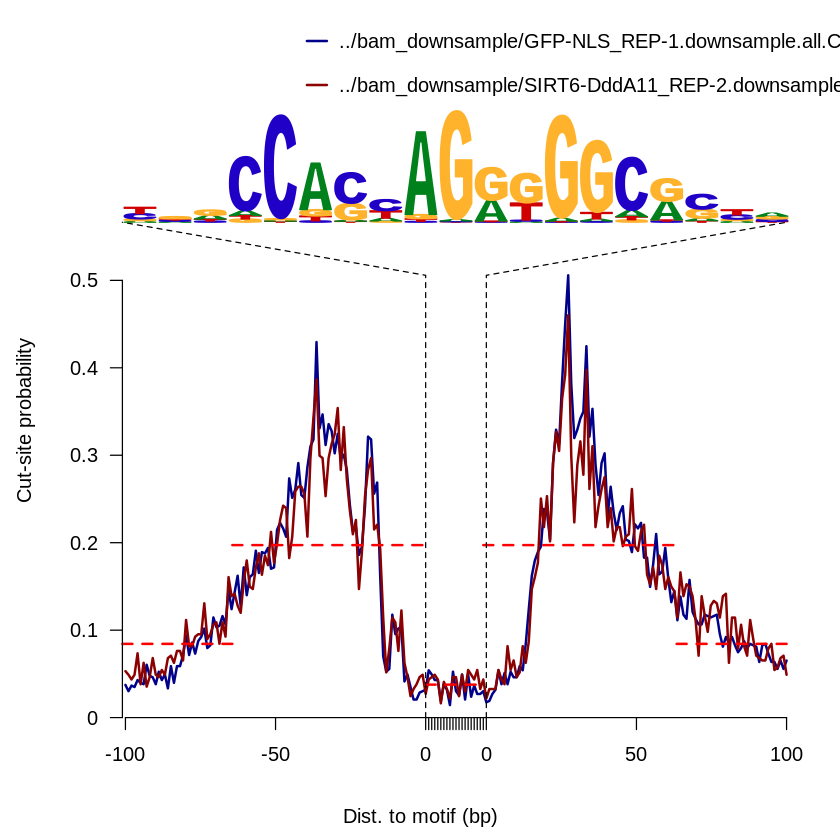

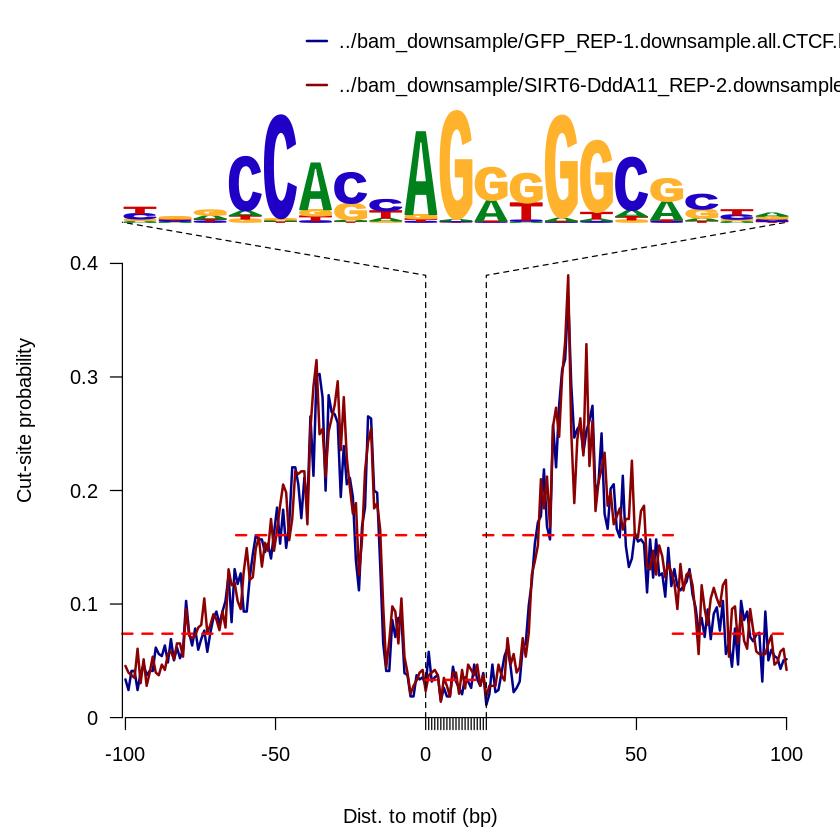

In [29]:
# wt2 vs GFP-NLS
shifted.bamFile = c('../bam_downsample/ND6-DddAwt_REP-2.downsample.all.CTCF.bam', '../bam_downsample/GFP-NLS_REP-1.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )
# wt2 vs GFP
shifted.bamFile = c('../bam_downsample/ND6-DddAwt_REP-2.downsample.all.CTCF.bam', '../bam_downsample/GFP_REP-1.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )
# SIRT6_2 vs GFP-NLS
shifted.bamFile = c('../bam_downsample/SIRT6-DddA11_REP-2.downsample.all.CTCF.bam', '../bam_downsample/GFP-NLS_REP-1.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )
# SIRT6_2 vs GFP
shifted.bamFile = c('../bam_downsample/SIRT6-DddA11_REP-2.downsample.all.CTCF.bam', '../bam_downsample/GFP_REP-1.downsample.all.CTCF.bam')
ctcf <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
                         genome=genome,
                         min.score="90%", seqlev=seqlev,
                         upstream=100, downstream=100,
                         # group=paste(shifted.bamFile, seqlev),
                         group=shifted.bamFile
                        )

In [30]:
ctcf$spearman.correlation

$`../bam_downsample/GFP_REP-1.downsample.all.CTCF.bam`

	Spearman's rank correlation rho

data:  predictedBindingSiteScore and highest.sig.windows
S = 70482761, p-value = 6.409e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2468648 


$`../bam_downsample/SIRT6-DddA11_REP-2.downsample.all.CTCF.bam`

	Spearman's rank correlation rho

data:  predictedBindingSiteScore and highest.sig.windows
S = 71363706, p-value = 4.881e-12
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2374516 



In [14]:
# pdf("ctcf_footprnt.pdf")
# sigs <- factorFootprints(shifted.bamFile, pfm=CTCF[[1]],
#                          genome=genome,
#                          min.score="90%", seqlev=seqlev,
#                          upstream=100, downstream=100)
# dev.off()

# [for back]查看ATAC-seq在目标位置的信号变化 use Python

In [2]:
import pandas as pd
from pybedtools import BedTool
from bioat.lib.libpandas import set_option
from bioat.lib.libpath import HOME
set_option()

INFO  @ 2023-09-02 21:52:11 bioat.lib.libpandas.set_option: set pandas: max_colwidth=40
INFO  @ 2023-09-02 21:52:11 bioat.lib.libpandas.set_option: set pandas: display.width=120
INFO  @ 2023-09-02 21:52:11 bioat.lib.libpandas.set_option: set pandas: display.max_columns=None
INFO  @ 2023-09-02 21:52:11 bioat.lib.libpandas.set_option: set pandas: display.max_rows=50


## 准备df

### df_ctcf
- weak
- medium
- strong
- overlapped with offs

In [11]:
df_new_offs = pd.read_csv(
    f'{HOME}/3.project/2022_DdCBE-3D-Genome_topic/2022-09-30_Detect-seq_batch-1_ATP8_JAK2_SIRT6/final_list_after_igv_check/2023-08-25_merged_final_list_after_classification_step11.csv',
    header=0,
    usecols=['region_index', '<sample>', 'TAS-Dep_stat']
)
df_new_offs[['chrom', 'start', 'end']] = df_new_offs['region_index'].str.split('_', expand=True)
df_new_offs[['start', 'end']] = df_new_offs[['start', 'end']].astype(int)
df_new_offs = df_new_offs[['chrom', 'start', 'end', '<sample>', 'TAS-Dep_stat']].copy()
df_new_offs.drop_duplicates(keep='first', inplace=True)
df_new_offs

,chrom,start,end,<sample>,TAS-Dep_stat
0,chr10,123171505,123171552,DetectSeq_ATP8-DddA11_REP-1,Right
1,chr1,170722780,170722831,DetectSeq_ATP8-DddA11_REP-1,Right
2,chr3,37937249,37937275,DetectSeq_ATP8-DddA11_REP-1,Right
3,chr9,109215689,109215762,DetectSeq_ATP8-DddA11_REP-1,Right
4,chr4,6913454,6913499,DetectSeq_ATP8-DddA11_REP-1,Right
...,...,...,...,...,...
15534,chr10,128384499,128384514,DetectSeq_SIRT6-DddA11_REP-2,Unassorted
15535,chr12,15347619,15347715,DetectSeq_SIRT6-DddA11_REP-2,Unassorted
15536,chr8,10421103,10421126,DetectSeq_SIRT6-DddA11_REP-2,Unassorted
15537,chr1,165880762,165880807,DetectSeq_SIRT6-DddA11_REP-2,Unassorted


In [12]:
# df_old_offs = pd.read_csv(
#     f'{HOME}/3.project/2022_DdCBE-3D-Genome_topic/2022-09-30_Detect-seq_batch-1_ATP8_JAK2_SIRT6/tables/2022-10-05_WT_ND4-5.1-6_final-list.bed',
#     header=None, sep='\t', names=['chrom', 'start', 'end', 'name', 'score', 'strand']
# )
# df_old_offs = df_old_offs.query('name.str.contains("IND")').copy()
# df_old_offs

In [13]:
# df_offs = pd.concat(
#     [
#         df_old_offs.iloc[:,:3],
#         df_new_offs.iloc[:,:3]
#     ]
# )
# df_offs

### df_offs

In [ ]:
df_offs = pd.read_csv(
    '/home/zhaohuanan/3.project/2022_DdCBE-3D-Genome_topic/'
    '2022-09-30_Detect-seq_batch-1_ATP8_JAK2_SIRT6/tables/'
    '2022-10-05_WT_ND4-5.1-6_final-list.bed',
    header=None, sep='\t', names=['chrom', 'start', 'end', 'name', 'score', 'strand']
)
df_offs

In [ ]:
df_offs_IND = pd.concat(
    [
        # df_offs.query('name.str.contains("ND6-TAS.DL")'),
        # df_offs.query('name.str.contains("ND6-TAS.DR")'),
        df_offs.query('name.str.contains("ND6-TAS.IND")')
    ]
)
df_offs_IND

In [ ]:
df_offs_DEP = pd.concat(
    [
        df_offs.query('name.str.contains("ND6-TAS.DL")'),
        df_offs.query('name.str.contains("ND6-TAS.DR")'),
        # df_offs.query('name.str.contains("ND6-TAS.IND")')
    ]
)
df_offs_DEP

In [ ]:
df_offs_IND.to_csv(f'../bed_for_count/2023-05-12_offs-ND6-IND_for_count.bed', header=False, index=False, sep='\t')
df_offs_DEP.to_csv(f'../bed_for_count/2023-05-12_offs-ND6-DEP_for_count.bed', header=False, index=False, sep='\t')

### df_random

In [ ]:
random = BedTool().random(l=200, n=33000, genome='hg38', seed=123)
print(random.to_dataframe())
random_fa = random.sequence(fi='/home/zhaohuanan/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa')
df_random = pd.DataFrame(random_fa.print_sequence().split('>')[1:], columns=['info'])
df_random[['coordinate', 'sequence']] = df_random['info'].str.strip().str.split('\n', expand=True)
df_random = df_random.query('~sequence.str.upper().str.contains("N")').copy()
df_random

In [ ]:
df_random[['chrom', 'start', 'end']] = df_random['coordinate'].str.replace(':', '\t').str.replace('-', '\t').str.split('\t', expand=True)
df_random[['start', 'end']] = df_random[['start', 'end']].astype(int)
df_random

In [ ]:
df_random = df_random.merge(random.to_dataframe(), on=['chrom', 'start', 'end'], how='left')
df_random

In [ ]:
df_random = df_random[['chrom', 'start', 'end', 'name', 'score', 'strand']].copy()
df_random

In [ ]:
# rm overlapped with df_ctcf, df_offs
a = BedTool.from_dataframe(df_ctcf.iloc[:,:3])
b = BedTool.from_dataframe(df_random.iloc[:,:3])
df_random = b.intersect(a, loj=True).to_dataframe().query('score==-1').iloc[:, :3].merge(df_random, on=['chrom', 'start', 'end'], how='left')



df_offs = pd.concat(
    [
        df_old_offs.iloc[:,:3],
        df_new_offs.iloc[:,:3]
    ]
)
# df_offs



a = BedTool.from_dataframe(df_offs.iloc[:,:3])
b = BedTool.from_dataframe(df_random.iloc[:,:3])
df_random = b.intersect(a, loj=True).to_dataframe().query('score==-1').iloc[:, :3].merge(df_random, on=['chrom', 'start', 'end'], how='left')


df_random

In [ ]:
df_random.to_csv(f'../bed_for_count/2023-05-12_random_for_count.bed', header=False, index=False, sep='\t')

### df_tss

In [ ]:
df_tss = pd.read_csv('ref_data/hg38_ucsc_refseq_NM_TSS_extend2kb.sorted.bed', sep='\t', header=None,
                    names=['chrom', 'start', 'end', 'name', 'score', 'strand'])
df_tss

In [ ]:
# rm overlapped with df_offs
df_offs = pd.concat(
    [
        df_old_offs.iloc[:,:3],
        df_new_offs.iloc[:,:3]
    ]
)
# df_offs
a = BedTool.from_dataframe(df_offs.iloc[:,:3])
b = BedTool.from_dataframe(df_tss.iloc[:,:3])
df_tss = b.intersect(a, loj=True).to_dataframe().query('score==-1').iloc[:, :3].merge(df_tss, on=['chrom', 'start', 'end'], how='left')
df_tss

In [ ]:
# with df_ctcf, without, df_ctcf
a = BedTool.from_dataframe(df_ctcf.iloc[:,:3])
b = BedTool.from_dataframe(df_tss.iloc[:,:3])
df_tss_has_ctcf = b.intersect(a, loj=True).to_dataframe().query('score!=-1').iloc[:, :3].merge(df_tss, on=['chrom', 'start', 'end'], how='left')
df_tss_no_ctcf = b.intersect(a, loj=True).to_dataframe().query('score==-1').iloc[:, :3].merge(df_tss, on=['chrom', 'start', 'end'], how='left')

In [ ]:
df_tss_has_ctcf = df_tss_has_ctcf.drop_duplicates(keep='first')
df_tss_has_ctcf

In [ ]:
df_tss_no_ctcf = df_tss_no_ctcf.drop_duplicates(keep='first')
df_tss_no_ctcf

In [ ]:
df_tss_has_ctcf.to_csv(f'../bed_for_count/2023-05-12_tss_has_ctcf_for_count.bed', header=False, index=False, sep='\t')
df_tss_no_ctcf.to_csv(f'../bed_for_count/2023-05-12_tss_no_ctcf_for_count.bed', header=False, index=False, sep='\t')

## 准备count-table

In [ ]:
from glob import glob

In [ ]:
ls_bam = sorted(glob('../bam/ATACSeq_*.sortp_genome_rmchrM_rmdup.bam'))
bams = [i.split('Seq_')[-1].split('.sortp')[0] for i in ls_bam]
ls_bed = sorted(glob('../bed_for_count/*.bed'))
beds = [i.split('2023-05-12_')[-1].split('_for_count')[0] for i in ls_bed]
print(bams)
print(beds)

In [ ]:
# # run snakemake

## 使用DESeq2分析比较ATAC-seq数据变化

In [ ]:
from glob import glob
import pandas as pd
import itertools as it

In [ ]:
ls_counts = sorted(glob('../bed_for_count/AnalysisChanges_*.count_table'))
ls_counts

In [ ]:
df = pd.DataFrame(ls_counts, columns=['file_path'])
# df

In [ ]:
df['sample'] = df.file_path.str.split('BAM_').str[-1].str.split('_BED').str[0]
df['region'] = df.file_path.str.split('BED_').str[-1].str.split('.count').str[0]
df.head()

In [ ]:
samples = sorted(df['sample'].unique())
regions = sorted(df['region'].unique())
print(regions)
print(samples)

In [ ]:
ls = []
for idx, line in df.iterrows():
    file_path, sample, region = line
    # print(file_path, sample, region)
    tmpdf = pd.read_csv(file_path, sep='\t', header=None)
    tmpdf['sample'] = sample
    tmpdf['region'] = region
    ls.append(tmpdf)
df_counts = pd.concat(ls)
df_counts.columns = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'depth', '_1', '_2', '_3', 'sample', 'region']
df_counts = df_counts[['sample', 'region', 'chrom', 'start', 'end', 'name', 'score', 'strand', 'depth']].copy()
df_counts

In [ ]:
df_counts['region_length'] = df_counts['end'] -  df_counts['start']
df_counts['region_index'] = df_counts['chrom'] + '_' + df_counts['start'].astype(str) + '_' + df_counts['end'].astype(str)
df_counts.drop_duplicates(subset=['sample', 'region', 'region_index'], keep='first', inplace=True)
df_counts.set_index(['region_index', 'region'], inplace=True)
df_counts

In [ ]:
clinical_df = df_counts.reset_index()[['sample']].drop_duplicates(ignore_index=True)
clinical_df.index = clinical_df['sample']
clinical_df['treatment'] = clinical_df['sample'].str.split('_REP-').str[0]
clinical_df.columns = ['condition', 'group']
clinical_df.index = clinical_df.index.str.replace('-', '_')
clinical_df['condition'] = clinical_df['condition'].str.replace('-', '_')
clinical_df['group'] = clinical_df['group'].str.replace('-', '_')
clinical_df

In [ ]:
# depth or RPKM from here

df_feature = df_counts[['sample', 'depth']].reset_index()

df_feature.index = df_feature['sample']
df_feature['depth'] = df_feature['depth'].astype(int)
df_feature['gene'] = df_feature['region_index']
df_feature.index = df_feature.index.str.replace('-', '_')
df_feature['sample'] = df_feature['sample'].str.replace('-', '_')
df_feature.index.name = 'index'
df_feature

In [ ]:
df_feature.groupby(['sample', 'region']).region_index.count()

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 3
import sys
sys.path.insert(0, "/home/zhaohuanan/3.project/2022_DdCBE-3D-Genome_topic/2023-04-25_ATAC-seq/PyDESeq2")
import pydeseq2
print(f'pydeseq2 path: {pydeseq2.__path__}')


from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [ ]:
dt_dds_condition = {}
dt_dds_group = {}

In [ ]:
ref_condition = "GFP_NLS_REP_1"
ref_group = "GFP_NLS"

In [ ]:
for region in df_feature.region.unique():
    if region in dt_dds_condition and region in dt_dds_group:
        print(f'dds: {region} already exist')
        continue
    else:
        counts_df = df_feature.query('region==@region').copy()
        counts_df = counts_df.pivot_table(values='depth', index='sample', columns='gene', fill_value=0)
        genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
        counts_df = counts_df[genes_to_keep]

        dds = DeseqDataSet(counts=counts_df, clinical=clinical_df, design_factors='condition', refit_cooks=True, n_cpus=24, ref_level=["condition", ref_condition])
        dds.deseq2()
        dt_dds_condition[region] = dds

        dds = DeseqDataSet(counts=counts_df, clinical=clinical_df, design_factors='group', refit_cooks=True, n_cpus=24, ref_level=["group", ref_group])
        dds.deseq2()
        dt_dds_group[region] = dds
print('Done')

In [ ]:
dt = {}

In [ ]:
for region in df_feature.region.unique():
    dds = dt_dds_condition[region]

    for sample in dds.obs_names:


        key = f"{region}:{sample}_vs_{ref_condition}"

        if key in dt or sample == ref_condition:
            print(f'{key} already exist, continue')
            continue
        else:
            stat_res = DeseqStats(dds, contrast=["condition", sample, ref_condition], n_cpus=8)  # ['variable_of_interest', 'tested_level', 'ref_level']
            stat_res.summary()
            out_df = stat_res.results_df
            out_df['region'] = region
            out_df['compare'] = sample

            dt[key] = out_df
            del out_df
        del stat_res
print('Done')

In [ ]:
import numpy as np
from lets_plot import *


LetsPlot.setup_html()

In [ ]:
ls = [v for k, v in dt.items()]
df_plot_adj = pd.concat(ls)
df_plot_adj.columns = [
    'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj',
    "region", 'compare'
]
df_plot_adj

In [ ]:
pd.DataFrame(df_plot_adj['compare'].unique())

In [ ]:
df_plot_adj = (
    df_plot_adj
    .query('log2FoldChange.notna()')
    .query('baseMean>=10')
    .query('padj.notna()')
)

In [ ]:
df_plot_adj.fillna(0, inplace=True)
df_plot_adj

In [ ]:
df_plot_adj.to_csv('2023-05-25_DESeq2_results.csv.gz')

## 分析得到的差异数据,可视化火山图

In [ ]:
import math
import numpy as np
import pandas as pd

In [ ]:
df_plot_adj = pd.read_csv('2023-05-25_DESeq2_results.csv.gz', index_col=0)

df_plot_adj.head()

In [ ]:
df_plot_adj.describe()

In [ ]:
df_plot_adj.log2FoldChange.abs().describe()

In [ ]:
df_plot_adj.log2FoldChange.abs().quantile(0.99)

In [ ]:
math.pow(2, 0.1442695040888963)

In [ ]:
math.log2(1.11)

In [ ]:
# fc_mt = -math.log2(2)
# fc_lt = math.log2(2)
fc_mt = -1
fc_lt = 1
FDR = 0.001

In [ ]:
def expresesion(x):
    if x['baseMean'] >= 10:
        if (x['log2FoldChange'] >= fc_lt) and (x['padj'] <= FDR):
            return 'Up-regulated'
        elif (x['log2FoldChange'] <= fc_mt and (x['padj'] <= FDR)):
            return 'Down-regulated'
        else:
            return 'Unchanged'
    else:
        return np.NaN

df_plot_adj['expression'] = df_plot_adj.apply(expresesion, axis=1)
df_plot_adj_filter = df_plot_adj.dropna(axis=0).copy()
print(df_plot_adj_filter.expression.value_counts())
df_plot_adj_filter.baseMean.describe()

In [ ]:
df_plot_adj_filter.query('region=="offs-ND6-IND"').expression.value_counts()

In [ ]:
df_plot_adj_filter = pd.concat(
    [
        df_plot_adj_filter.query('expression=="Unchanged"'),
        # df_plot_adj_filter.query('expression=="Unchanged"').sample(50000),
        df_plot_adj_filter.query('expression!="Unchanged"')
    ]
)

In [ ]:
df_plot_adj_filter['-log10(FDR)'] = df_plot_adj_filter['padj'].map(lambda x: -math.log10(x) if x != 0 else 0)
df_plot_adj_filter.dropna(axis=0, inplace=True)
df_plot_adj_filter

In [ ]:
df_count_info = df_plot_adj_filter.groupby(['compare', 'region', 'expression'])['baseMean'].count().reset_index()
df_count_info['counts'] = df_count_info['expression'] + ': \t' + df_count_info['baseMean'].astype(str)
df_count_info = df_count_info.groupby(['compare', 'region'])['counts'].agg('\n'.join).reset_index()
df_count_info['counts'] = df_count_info['counts'].str.replace('Down-regulated', 'Down').str.replace('Up-regulated', 'Up').str.replace('Unchanged', '-')
df_count_info['log2FoldChange'] = 1.5
df_count_info['-log10(FDR)'] = 9
df_count_info.head()

In [ ]:
ref_condition = "GFP_NLS_REP_1"
ref_group = "GFP_NLS"

In [ ]:
from lets_plot import *
LetsPlot.setup_html()


g = (    # 加N！！！
    ggplot(
        data=df_plot_adj_filter,
        # data=df_plot_adj_filter.sample(10000),
        mapping=aes(x='log2FoldChange', y='-log10(FDR)')
    )
    # + font_family_info("Arial", mono=True)
    + geom_point(
        mapping=aes(color='expression'), size=1.5
    )
    + geom_text(
        data=df_count_info,
        mapping=aes(label='counts'),
        hjust='left',
        size=5
    )
    + geom_vline(xintercept=fc_mt, size=0.4, color="black")
    + geom_vline(xintercept=fc_lt, size=0.4, color="black")
    + geom_hline(yintercept=-math.log10(FDR), size=0.4, color="black")
    + scale_x_continuous(limits=(-4.5, 4.5), breaks=[-4, -3, -2, -1, 0, 1, 2, 3, 4])
    + scale_y_continuous(limits=(0.0001, 10), breaks=[0, 3, 6, 9])
    + scale_color_manual(values=["gray","red", "blue"])
    + facet_grid(x='region', y='compare')
    + ggsize(width=1600, height=850)
    + xlab('log2FoldChange')
    + ylab('-log10FDR')
    + ggtitle(f'samples v.s. {ref_condition}, mean_count>=10')
    + theme_bw()

)

# g

figure
<!-- 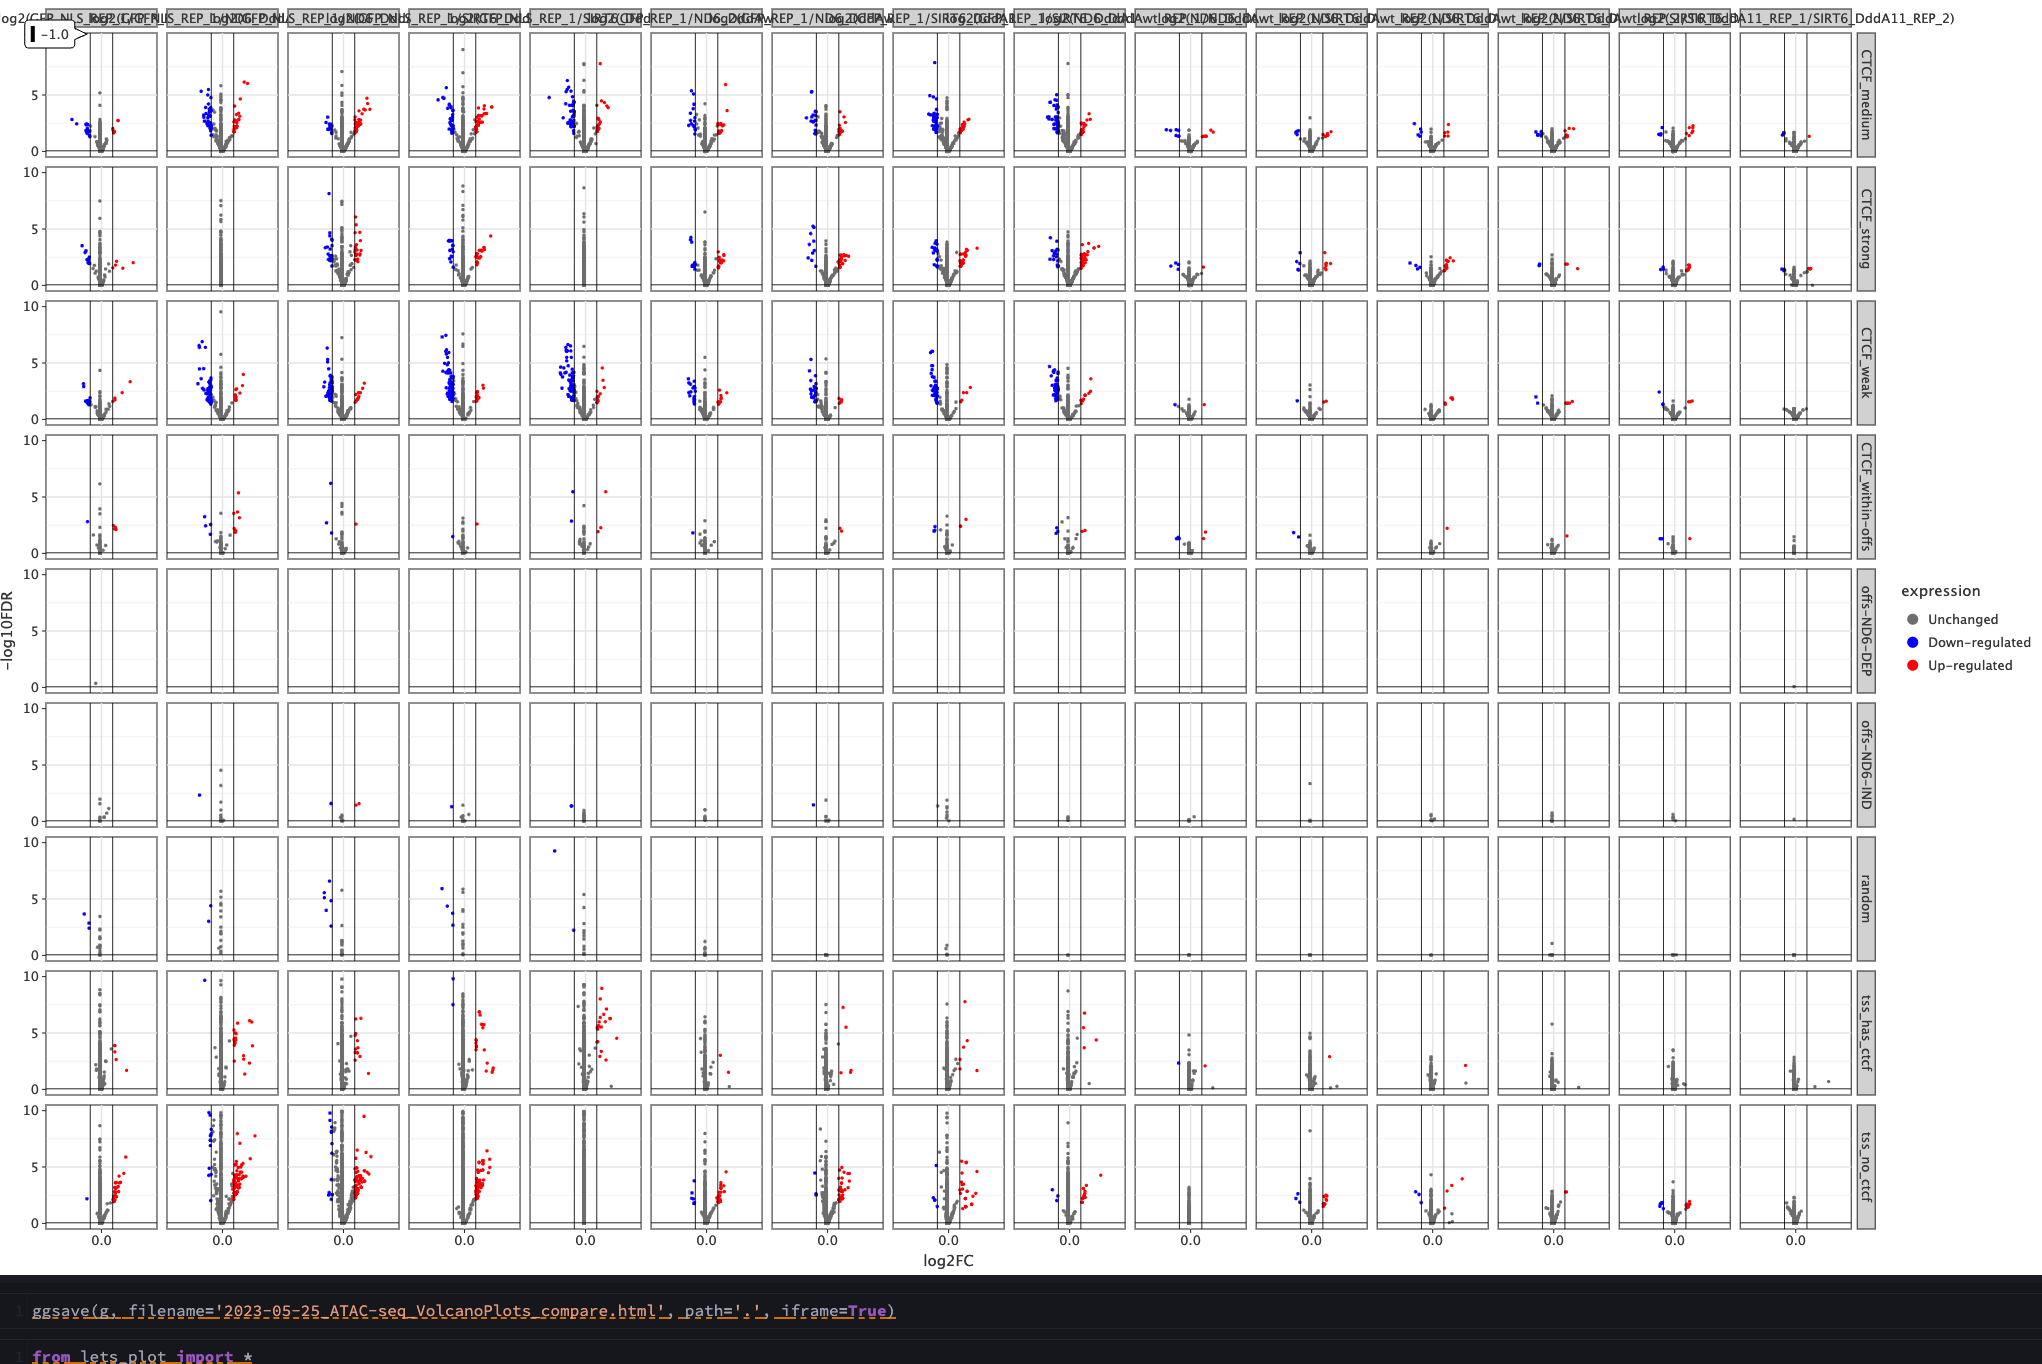 -->

In [ ]:
ggsave(g, filename='2023-06-09_ATAC-seq_VolcanoPlots_compare.html', path='.', iframe=False)

In [ ]:
df_up_and_down = df_plot_adj_filter.query('expression!="Unchanged"')
df_up_and_down

In [ ]:
g = (
    ggplot(data=df_up_and_down, mapping=aes(x='compare', y='baseMean', fill='expression'))
    + geom_bar(stat='count', position='dodge')
    + scale_fill_manual(values=["red", "blue"])
    + facet_wrap('region', ncol=4, scales='free_y')
    + ggtitle('Up- & Down-regulated counts')
    + ylab('counts')
    + xlab('sample v.s. GFP-NLS_REP-1')
)
g

In [ ]:
ggsave(g, filename='2023-06-09_ATAC-seq_Up_and_Down_Counts_compare.svg', path='.', iframe=False)

In [ ]:
dt_region_up = {}
dt_region_down = {}

for region, df_a_region in df_up_and_down.groupby('region'):
    df_region_up = pd.DataFrame()
    df_region_down = pd.DataFrame()
    for compare, df_a_compare in df_a_region.groupby('compare'):
        for expression, df_a_exp in df_a_compare.groupby('expression'):
            tmpdf = df_a_exp[['expression']].copy()
            tmpdf.columns = [compare]
            if expression == 'Up-regulated':
                df_region_up = df_region_up.merge(tmpdf, left_index=True, right_index=True, how='outer')
            elif expression == 'Down-regulated':
                df_region_down = df_region_down.merge(tmpdf, left_index=True, right_index=True, how='outer')
            else:
                pass
    dt_region_up[region] = df_region_up
    dt_region_down[region] = df_region_down

In [ ]:
df_count = pd.DataFrame()

for region, df in dt_region_up.items():
    tmpdf = df.count(axis=1).value_counts().to_frame()
    tmpdf.columns = [region]
    df_count = df_count.merge(tmpdf, left_index=True, right_index=True, how='outer')
df_count = df_count.fillna(0).astype(int)
df_count

df_count = df_count.melt(ignore_index=False).reset_index()
df_count.columns = ['share_number', 'region', 'share_count']
df_count['expression'] = 'Up-regulated'

df_count_up = df_count.copy()

df_count = pd.DataFrame()

for region, df in dt_region_down.items():
    tmpdf = df.count(axis=1).value_counts().to_frame()
    tmpdf.columns = [region]
    df_count = df_count.merge(tmpdf, left_index=True, right_index=True, how='outer')
df_count = df_count.fillna(0).astype(int)
df_count

df_count = df_count.melt(ignore_index=False).reset_index()
df_count.columns = ['share_number', 'region', 'share_count']
df_count['expression'] = 'Down-regulated'

df_count_down = df_count.copy()

In [ ]:
df_count = pd.concat([df_count_up, df_count_down])
df_count

In [ ]:
g = (
    ggplot(data=df_count, mapping=aes(x='share_number', y='share_count', fill='expression'))
    + geom_bar(stat='identity', position='dodge')
    + scale_fill_manual(values=["red", "blue"])
    + facet_grid(x='region', y='expression', scales='free_y')
    + ggtitle('Up- & Down-regulated Share Counts')
    + scale_x_continuous(breaks=[1, 2, 3, 4, 5])
    + scale_y_log10()
    + ggsize(width=1100, height=450)
)
g

In [ ]:
ggsave(g, filename='2023-06-09_ATAC-seq_Up_and_Down_Share_Counts.svg', path='.', iframe=False)

In [ ]:
df_plot_adj_filter.sort_values(
    by=['log2FoldChange', 'baseMean', 'padj'], 
    ascending=[False, False, True]
).query('expression!="Unchanged"').query('region=="CTCF_strong"').query('log2FoldChange>=2.5').query('baseMean>=30')

In [ ]:
df.sort_values?